In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

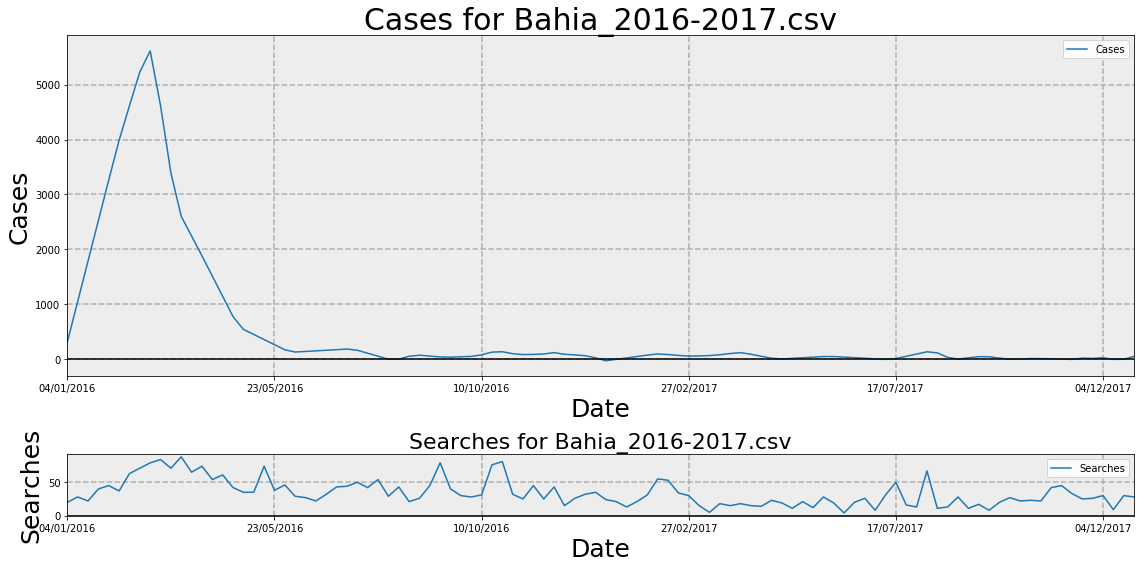

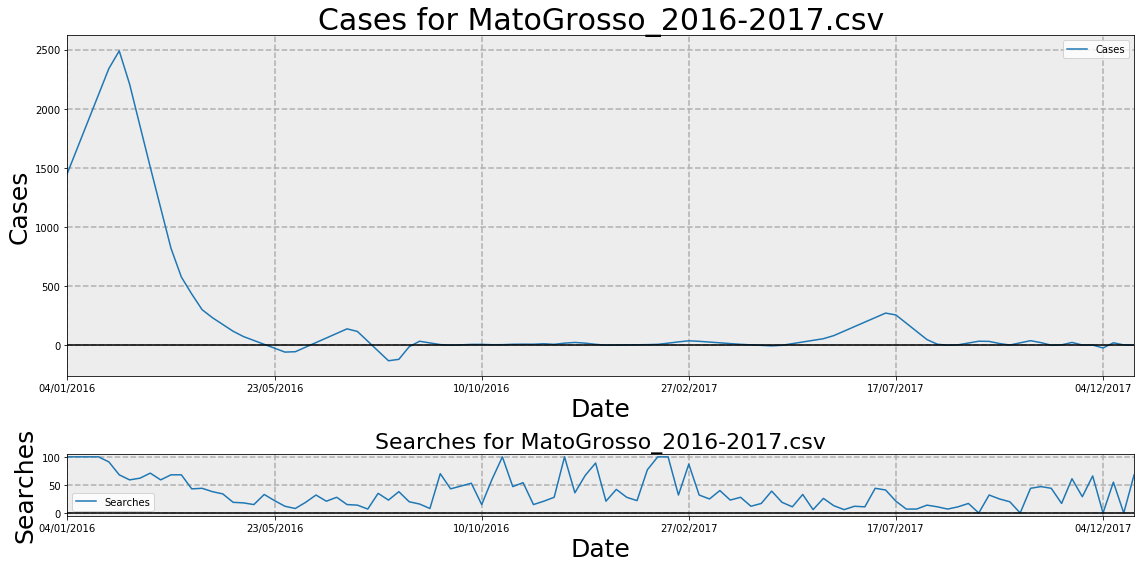

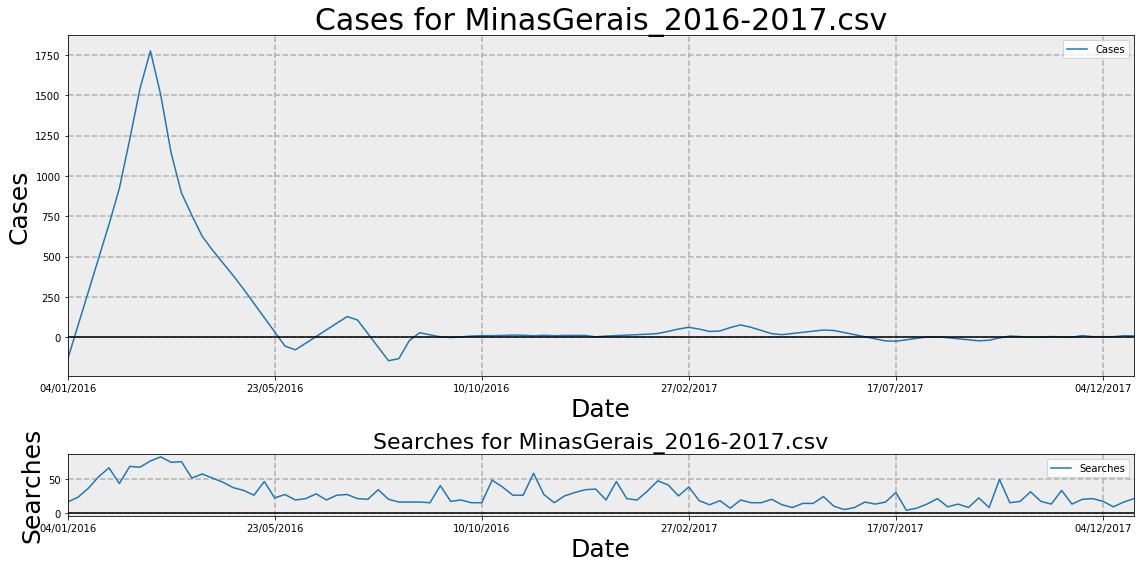

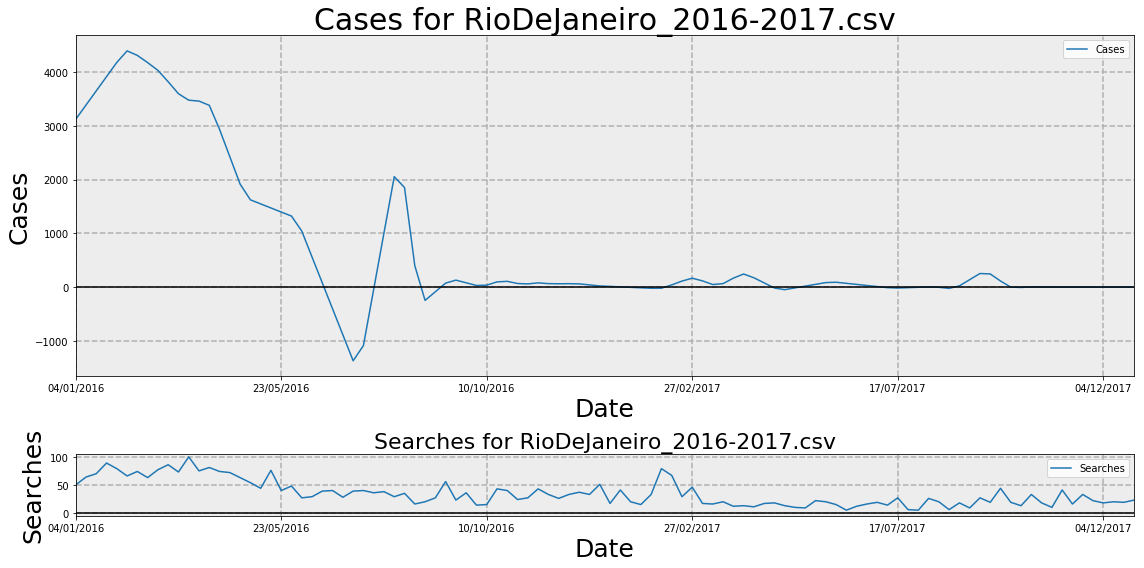

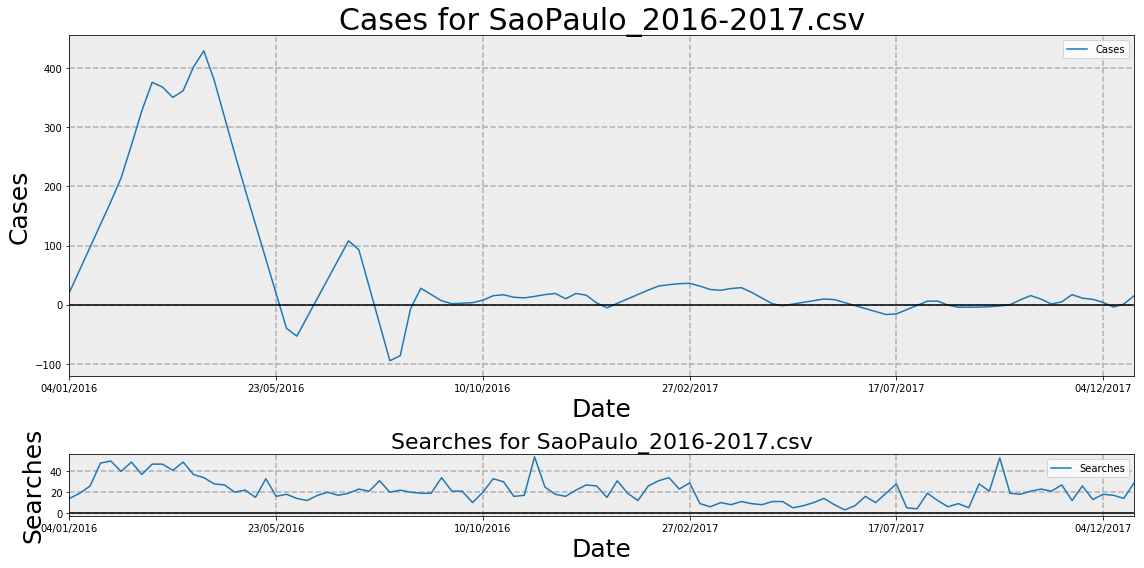

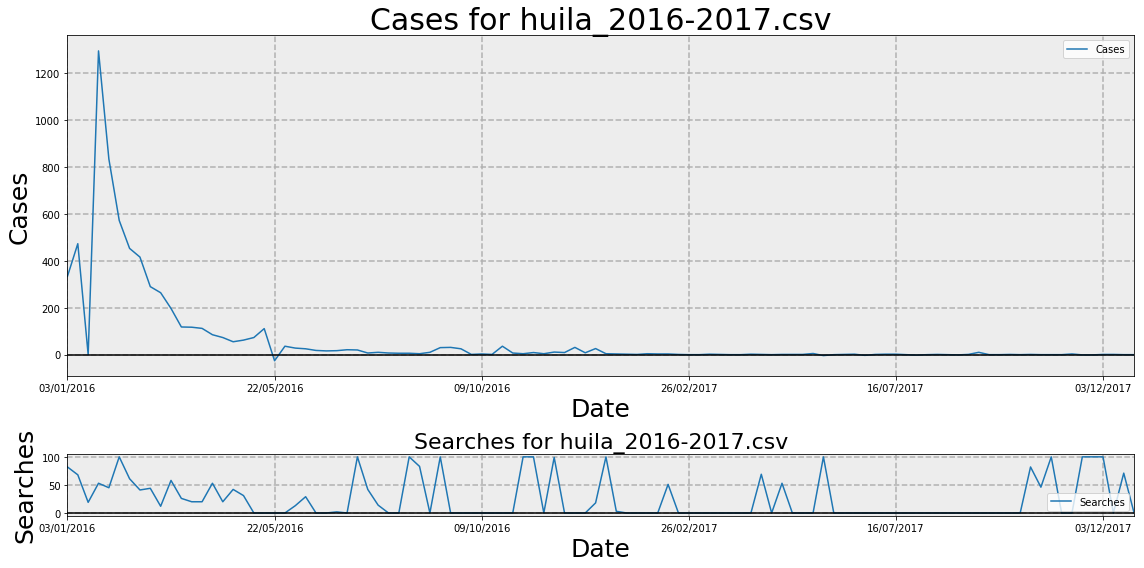

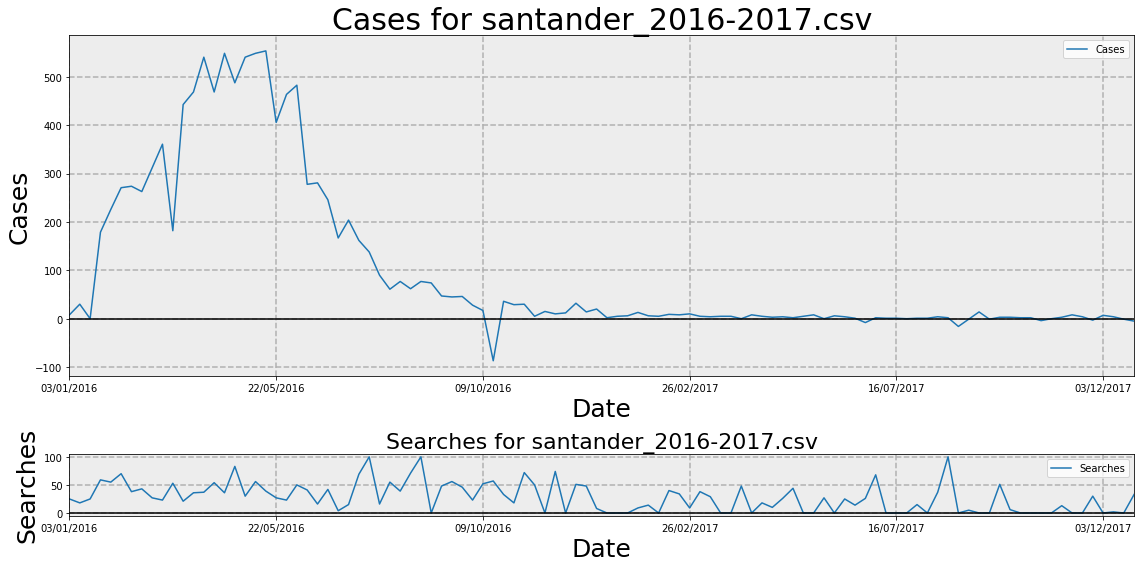

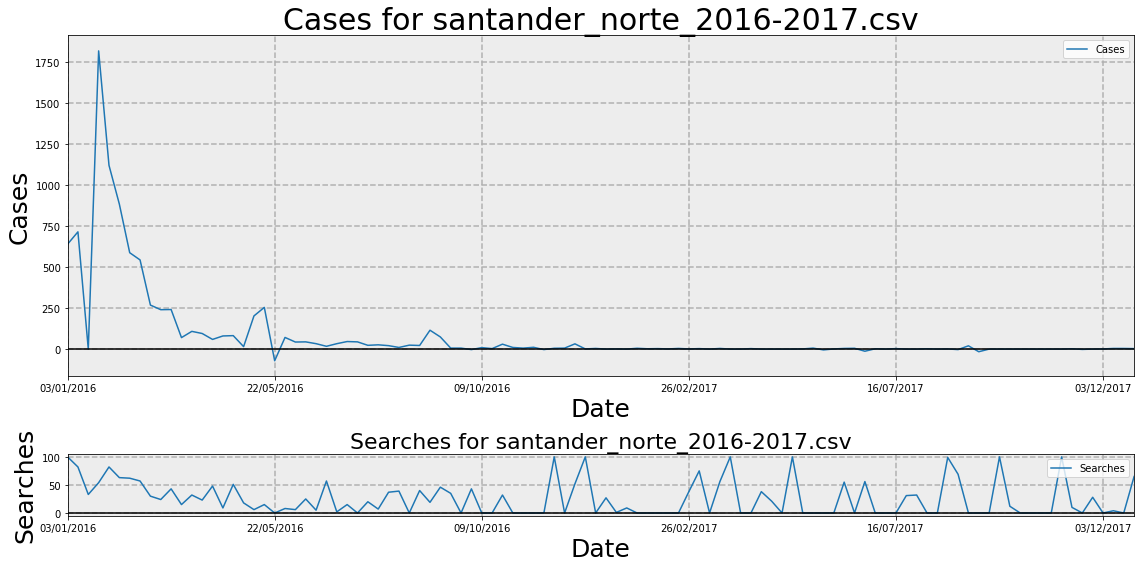

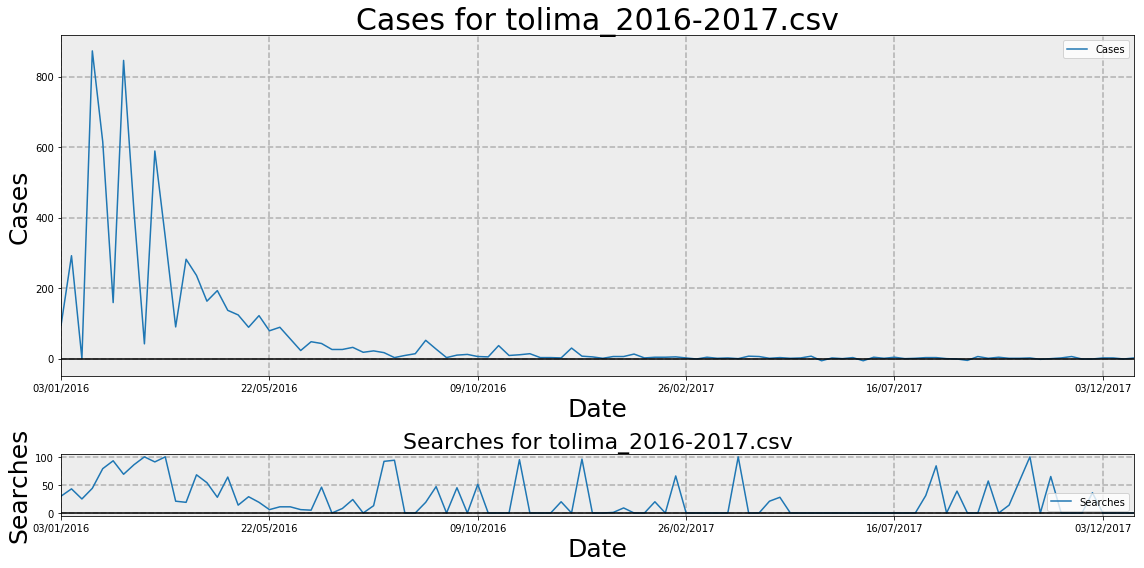

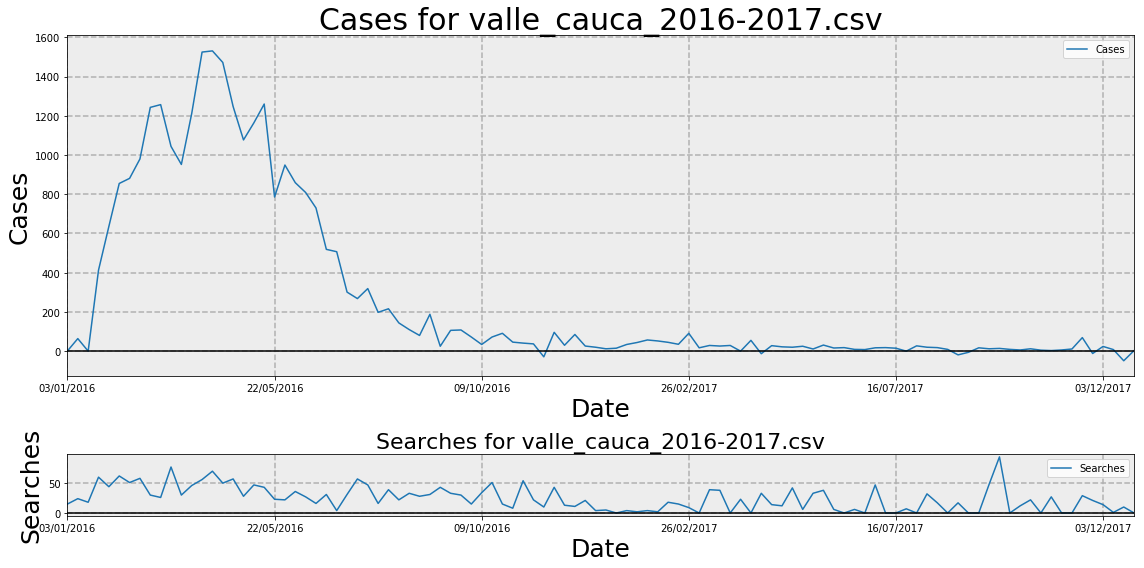

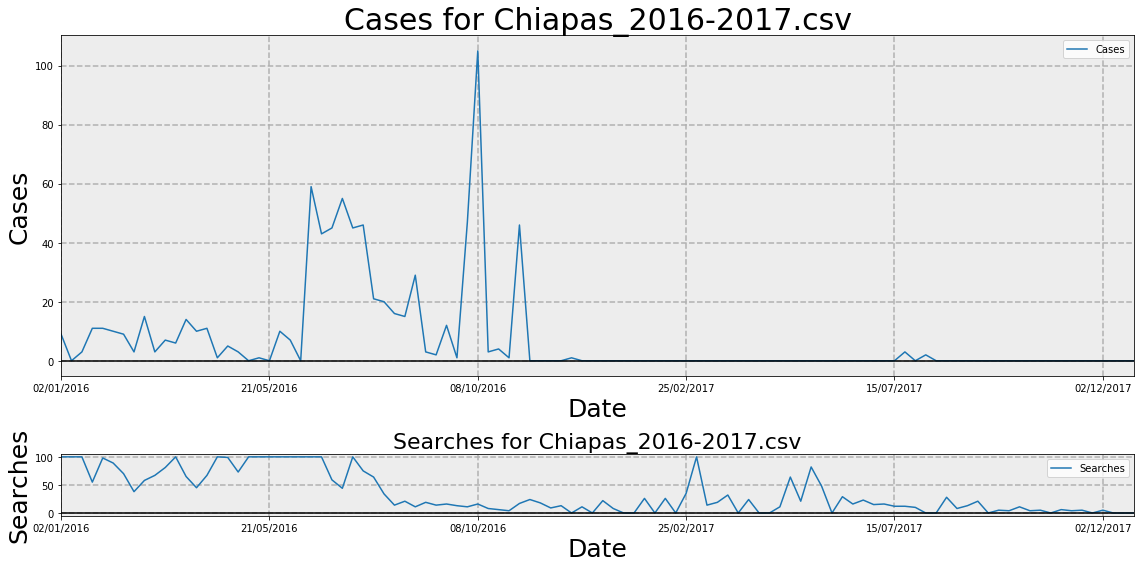

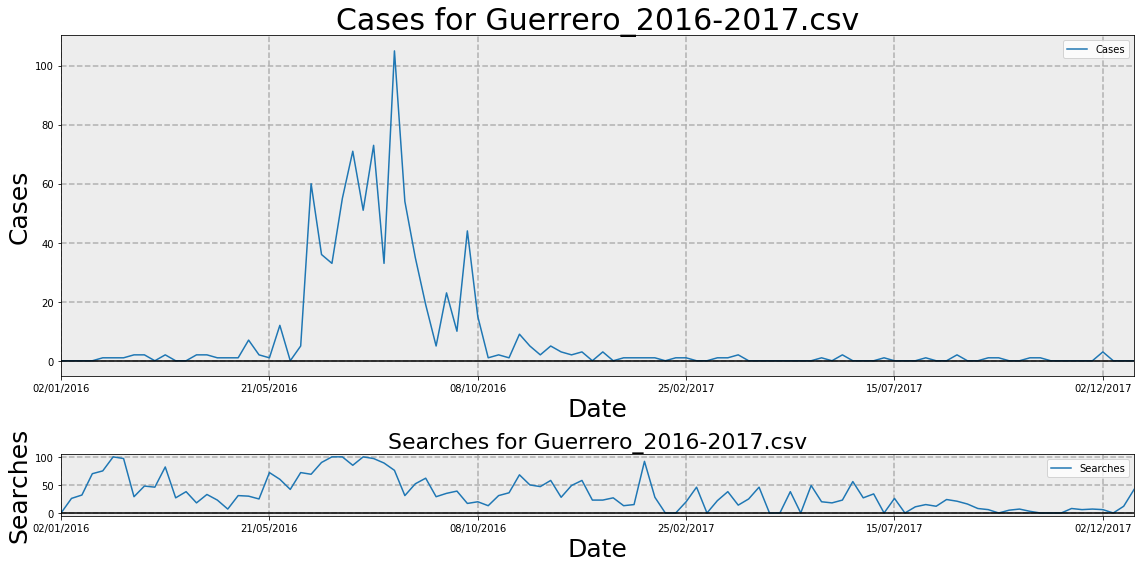

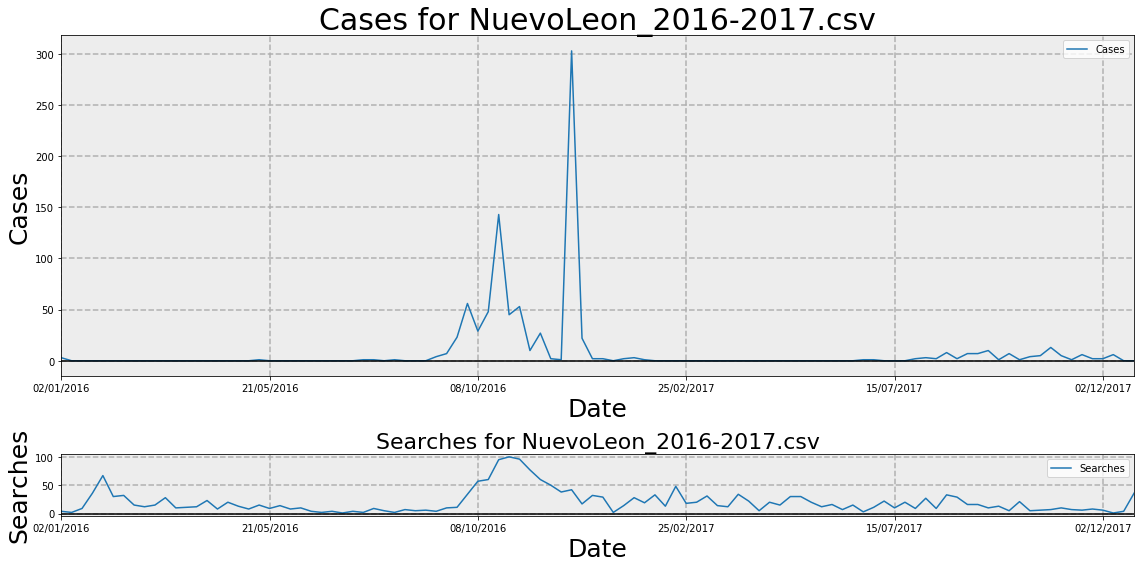

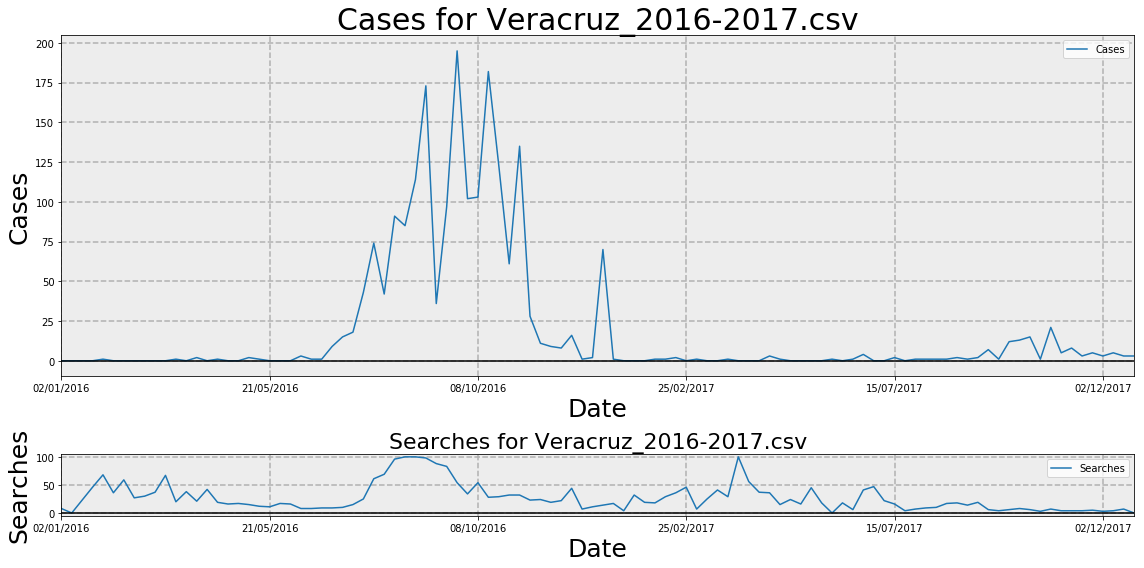

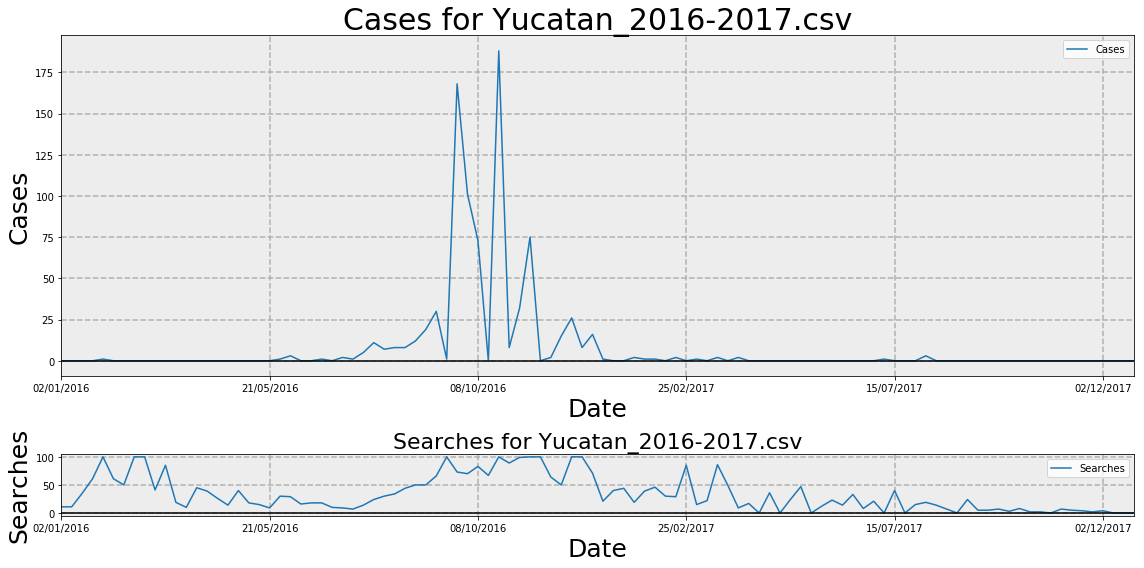

In [12]:
cumulativeCsv = pd.DataFrame(columns=["Country", "Cases 2016", "Cases 2017", "Total Cases"])
stateCsv = pd.DataFrame(columns=["State", "Cases 2016", "Cases 2017", "Total Cases"])

for country in ["Brazil", "Colombia", "Mexico"]:
    
    folder = "../data/{}/processed_data".format(country)
    files = os.listdir(folder)
    cases2016 = 0
    cases2017 = 0
    for file in files:
        dataset = pd.read_csv("{}/{}".format(folder, file), index_col=0)

        #plot
        fig = plt.figure(figsize=(16,8))
        ax1 = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)
        dataset[["Cases"]].plot(ax=ax1, legend=True)
        plt.title("Cases for {}".format(file), fontsize=30)
        plt.xlabel("Date", fontsize=25)
        plt.ylabel("Cases", fontsize=25)
        ax1.set_facecolor((0.9, 0.9, 0.9, 0.7))
        plt.axhline(linewidth=1.5, color='black')
        plt.grid(linestyle='dashed', linewidth=1.5)
        
        ax2 = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
        dataset[["Searches"]].plot(ax=ax2, legend=True)
        
        plt.title("Searches for {}".format(file), fontsize=22)
        plt.xlabel("Date", fontsize=25)
        plt.ylabel("Searches", fontsize=25)
        
        plt.axhline(linewidth=1.5, color="black")
        ax2.set_facecolor((0.9, 0.9, 0.9, 0.7))
        ax2.grid(linestyle='dashed', linewidth=1.5)
        plt.tight_layout()
        fig.savefig("../figures/{}.png".format(file[:-4]))
        
        cases2016 += dataset["Cases"][:52].sum()
        cases2017 += dataset["Cases"][52:].sum()
        
        stateCsv = stateCsv.append({
            "State" : file,
            "Cases 2016" : dataset["Cases"][:52].sum(),
            "Cases 2017" : dataset["Cases"][52:].sum(),
            "Total Cases" : dataset["Cases"][:52].sum() + dataset["Cases"][52:].sum()
        }, ignore_index=True)
        
        
        
    cumulativeCsv = cumulativeCsv.append({
        "Country": country,
        "Cases 2016" : cases2016,
        "Cases 2017" : cases2017,
        "Total Cases" : cases2016+cases2017
    },ignore_index=True)
stateCsv.to_csv("StateCases2016-2017.csv")
cumulativeCsv.to_csv("CumulativeCases2016-2017.csv")